In [ ]:
# Library Imports

import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.25.2
pandas: 1.5.3
re: 2.2.1
nltk: 3.8.1


In [ ]:
# Getting the Stop Words and Other Text Processing Libraries
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Capstone Project 9

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Capstone Project 9


In [ ]:
# Import my functions
import CAP9_1_AirLineTwitter_config

In [ ]:
## Define root folder
root_folder = CAP9_1_AirLineTwitter_config.RootFolder
OutputFiles  = root_folder+"\OutputFiles"
print(OutputFiles)

C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset\OutputFiles


In [ ]:
# Reading the First Round PreProcessed Data
# Data read - All Required data  are in datafolder
df = pd.read_csv(OutputFiles+"/Step1.1.2_merge_tweets_df.csv")
print(df.shape)

(13806, 17)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class'],
      dtype='object')

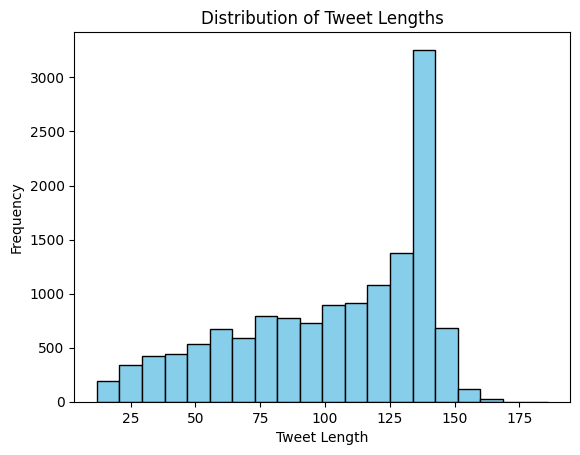

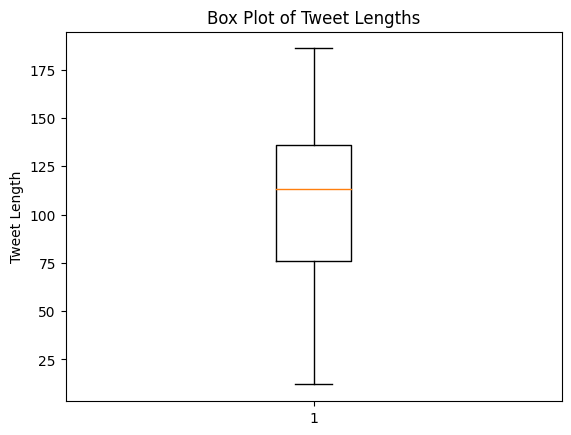

In [ ]:
import matplotlib.pyplot as plt

# Fill NaN values with an empty string
# df['Clean_text'] = df['Clean_tweet'].fillna('')

# Calculate the length of each cleaned tweet text
df['tweet_length'] = df['text'].apply(len)

# Plot histogram of tweet lengths
plt.hist(df['tweet_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

# Plot box plot of tweet lengths
plt.boxplot(df['tweet_length'])
plt.ylabel('Tweet Length')
plt.title('Box Plot of Tweet Lengths')
plt.show()


In [ ]:
# Removing URLs
df['text'] = df['text'].str.replace('(www\.[^\s]+)|(https?://[^\s]+)', '')

<ipython-input-10-588001b302ce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('(www\.[^\s]+)|(https?://[^\s]+)', '')


In [ ]:
# function to remove non-ASCII
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

df['text'] = df['text'].apply(remove_non_ascii)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df["Tweets_Without_Stop_Words"] = df['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

df["Tweets_Without_Stop_Words"]

df['Tweets_Without_Stop_Words'] = df['Tweets_Without_Stop_Words'].str.replace('\d+', '')

<ipython-input-12-bb54ce19c7e1>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweets_Without_Stop_Words'] = df['Tweets_Without_Stop_Words'].str.replace('\d+', '')


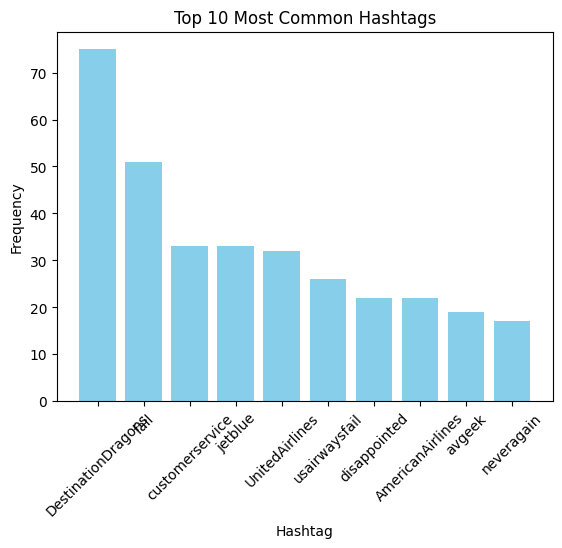

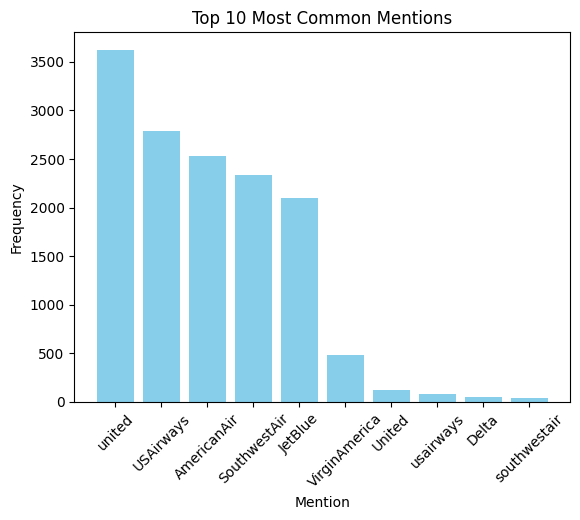

In [ ]:
import re
from collections import Counter

# Extract hashtags and mentions
hashtags = []dee

mentions = []

for tweet in df['text']:
    hashtags.extend(re.findall(r'#(\w+)', tweet))
    mentions.extend(re.findall(r'@(\w+)', tweet))

# Count the frequency of each hashtag and mention
hashtag_counts = Counter(hashtags)
mention_counts = Counter(mentions)

# Visualize the most common hashtags and mentions
top_hashtags = hashtag_counts.most_common(10)
top_mentions = mention_counts.most_common(10)

# Plot bar plots
plt.bar([tag[0] for tag in top_hashtags], [tag[1] for tag in top_hashtags], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Hashtags')
plt.xticks(rotation=45)
plt.show()

plt.bar([mention[0] for mention in top_mentions], [mention[1] for mention in top_mentions], color='skyblue')
plt.xlabel('Mention')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Mentions')
plt.xticks(rotation=45)
plt.show()


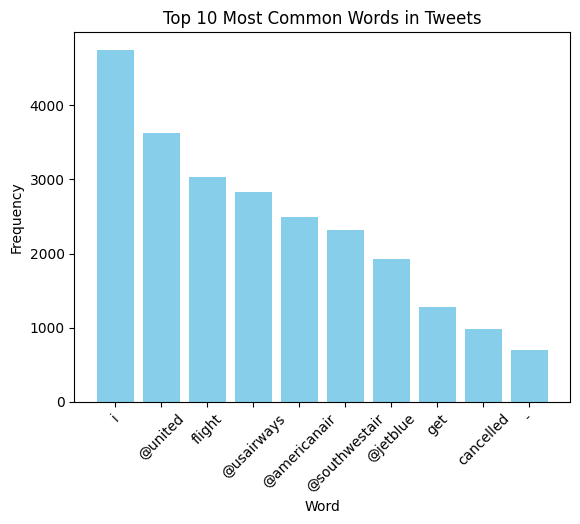

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['Tweets_Without_Stop_Words']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


In [ ]:
additional_stopwords = ['I', 'i', 'flight']
df["Tweets_Without_Stop_Words"] = df['Tweets_Without_Stop_Words'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in additional_stopwords))

df["Tweets_Without_Stop_Words"]

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus added commercials experien...
2        @virginamerica today... must mean need take an...
3                      @virginamerica really big bad thing
4        @virginamerica seriously would pay $ seats pla...
                               ...                        
13801            @americanair thank got different chicago.
13802    @americanair leaving minutes late flight. no w...
13803    @americanair please bring american airlines #b...
13804    @americanair money, change flight, answer phon...
13805    @americanair ppl need know many seats next fli...
Name: Tweets_Without_Stop_Words, Length: 13806, dtype: object

In [ ]:
df['Tweets_Without_Stop_Words'].replace(regex=True,inplace=True,to_replace='@[\w]*',value='')

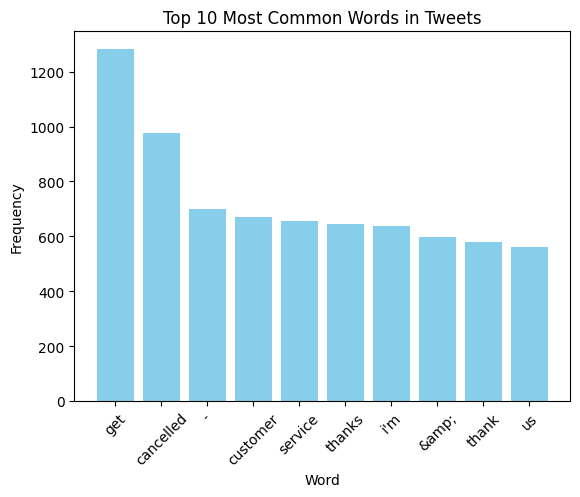

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['Tweets_Without_Stop_Words']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


In [ ]:

import html

# Assuming df is your DataFrame and 'text' is the column containing tweet text
df['cleaned_text'] = df['Tweets_Without_Stop_Words'].apply(html.unescape)


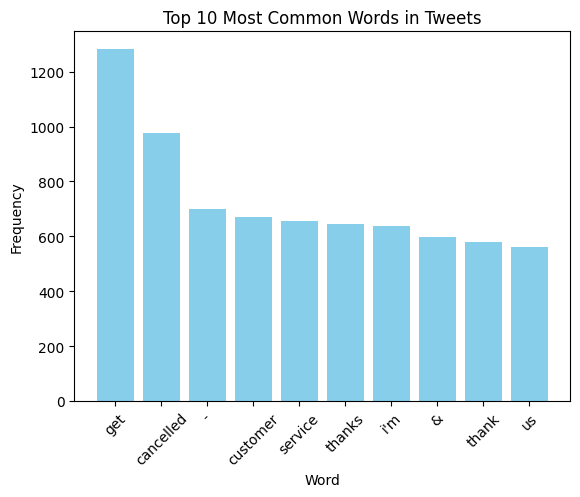

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['cleaned_text']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Removing special characters
spec_chars = ["!",'"',"#","%","&","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [ ]:
for char in spec_chars:
    df['cleaned_text'] = df['cleaned_text'].str.replace(char, '')

<ipython-input-21-b30004727482>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cleaned_text'] = df['cleaned_text'].str.replace(char, '')


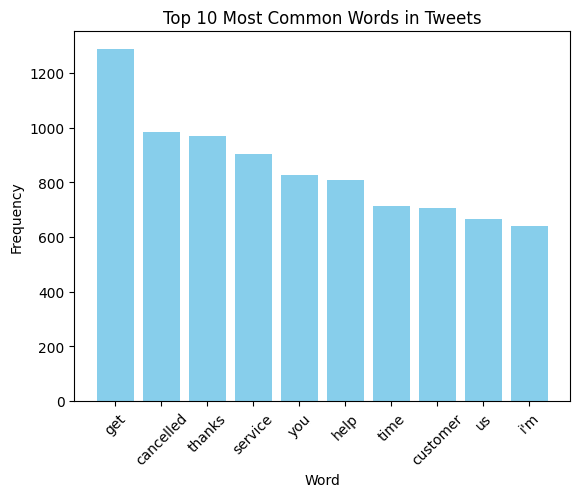

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['cleaned_text']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


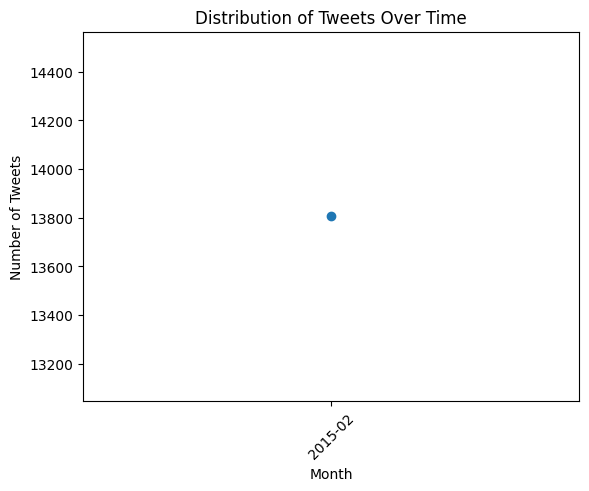

In [ ]:
# Convert 'tweet_created' column to string representation of the date
df['tweet_created_str'] = df['tweet_created'].astype(str)

# Count the number of tweets per month
tweets_per_month = df['tweet_created_str'].str[:7].value_counts().sort_index()

# Visualize the distribution of tweets over time using a line plot
plt.plot(tweets_per_month.index, tweets_per_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets Over Time')
plt.xticks(rotation=45)
plt.show()


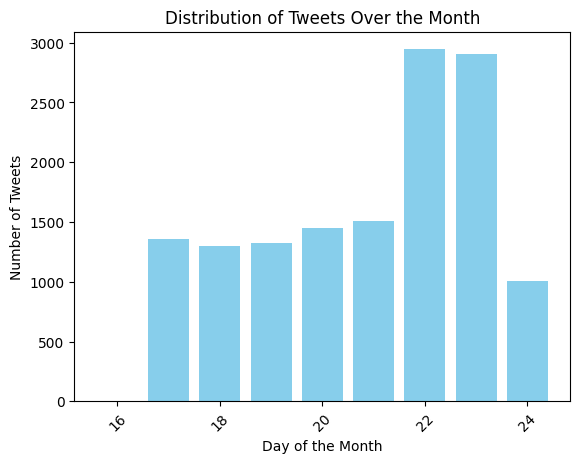

In [ ]:
# Convert 'tweet_created' column to datetime type
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Count the number of tweets per day
tweets_per_day = df['tweet_created'].dt.day.value_counts().sort_index()

# Visualize the distribution of tweets over the single month using a bar plot
plt.bar(tweets_per_day.index, tweets_per_day.values, color='skyblue')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets Over the Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
 %pip install contractions

In [ ]:
import contractions
df['cleaned_text_ExpandedTweets'] = df['cleaned_text'].apply(lambda words: contractions.fix(words))

In [ ]:
additional_stopwords = ['I', 'i', 'flight']
df["cleaned_text_ExpandedTweets"] = df['cleaned_text_ExpandedTweets'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in additional_stopwords))

df["cleaned_text_ExpandedTweets"] = df['cleaned_text_ExpandedTweets'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

df["cleaned_text_ExpandedTweets"]

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3                                     really big bad thing
4        seriously would pay $ seats playing really bad...
                               ...                        
13801                          thank got different chicago
13802    leaving minutes late warnings communication mi...
13803            please bring american airlines blackberry
13804    money change answer phones suggestions make co...
13805    people need know many seats next plz put us st...
Name: cleaned_text_ExpandedTweets, Length: 13806, dtype: object

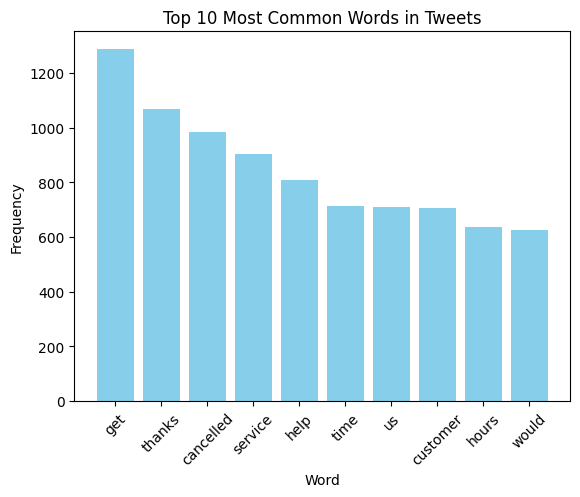

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['cleaned_text_ExpandedTweets']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus (needed for lemmatization)
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to determine the Part of Speech (POS) tag for WordNet Lemmatizer
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to preprocess and lemmatize the tweet text
def preprocess_and_lemmatize(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Lemmatize each word and join them back into a single string
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

# Apply preprocessing and lemmatization to the tweet text
df['cleaned_text_lemmatized'] = df['cleaned_text_ExpandedTweets'].apply(preprocess_and_lemmatize)

# Now you can proceed with sentiment analysis using TextBlob on the lemmatized text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['cleaned_text_lemmatized']

0                                                      say
1                     plus add commercial experience tacky
2                   today must mean need take another trip
3                                     really big bad thing
4        seriously would pay $ seat play really bad thi...
                               ...                        
13801                          thank get different chicago
13802    leave minute late warning communication minute...
13803             please bring american airline blackberry
13804    money change answer phone suggestion make comm...
13805    people need know many seat next plz put u stan...
Name: cleaned_text_lemmatized, Length: 13806, dtype: object

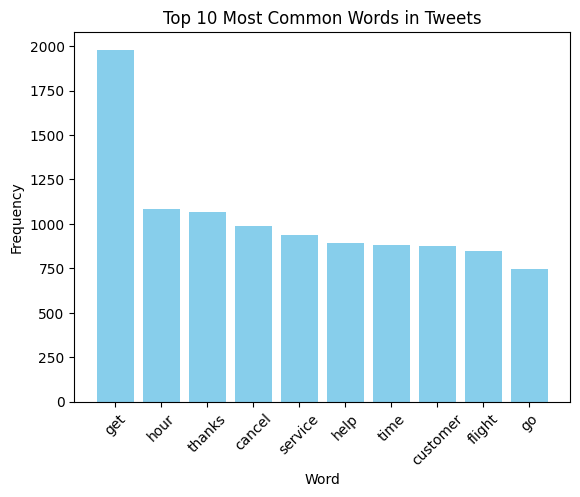

In [ ]:
from collections import Counter

# Tokenize the cleaned tweet text into individual words
all_words = ' '.join(df['cleaned_text_lemmatized']).split()

# Calculate the frequency of each word
word_counts = Counter(all_words)

# Visualize the most common words using a bar plot or word cloud
# Example: Bar plot
import matplotlib.pyplot as plt

top_words = word_counts.most_common(10)  # Get the top 10 most common words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.show()


In [ ]:
%pip install vaderSentiment


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    # Get sentiment scores
    sentiment_scores = analyzer.polarity_scores(text)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each tweet
df['sentiment_vader'] = df['cleaned_text_lemmatized'].apply(analyze_sentiment_vader)


In [ ]:
import nltk
from nltk.corpus import words

# Download the NLTK words corpus
nltk.download('words')

# Get the set of English words from NLTK
english_words = set(words.words())

# Function to filter out non-English words from text
def filter_non_english_words(text):
    # Tokenize the text into words
    words = text.split()
    # Filter out non-English words
    english_words_only = [word for word in words if word.lower() in english_words]
    # Join the remaining English words back into a single string
    return ' '.join(english_words_only)

# Apply the function to filter out non-English words from the 'cleaned_text' column
df['cleaned_text_english_only'] = df['cleaned_text_lemmatized'].apply(filter_non_english_words)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
#Save second round cleaned tweets_df
df.to_csv(OutputFiles+"/DataCleaning_SentimentCreation_df.csv", index = False)
print(colored("DATA SAVED", "green"))

DATA SAVED
